In [0]:
!unzip '/content/drive/My Drive/Deep Learning/Datasets/house-prices-advanced-regression-techniques.zip'

Archive:  /content/drive/My Drive/Deep Learning/Datasets/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [0]:
import pandas as pd
import numpy as np

In [0]:
sample_data=pd.read_csv('/content/sample_submission.csv')
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [103]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [0]:
train=train.fillna(0)
test=test.fillna(0)

In [0]:
#test.head()

In [0]:
#train.head()

In [105]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


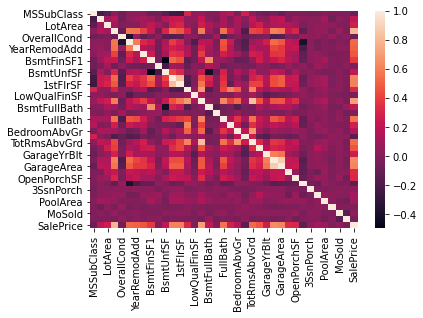

In [106]:
dummy_data=train
dummy_data=dummy_data.drop(columns=['Id'])
#GarrageCars
cor=dummy_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor)
plt.show()

In [0]:
df=cor['SalePrice']<0.0

In [0]:
d1={}
d1=df

In [0]:
#l1=[]
l2=[]
for i in d1.keys():
  #if d1[i]==False:
    #l1.append(i)
  if d1[i]==True:
    l2.append(i)


In [0]:
"""l3=l1+l2
cont_data=dummy_data[l1]
cate_data=dummy_data.drop(columns=l3)

dummy_data1=test
cont_data1=dummy_data1[l1]
cate_data1=dummy_data1.drop(columns=l3)
"""
train=train.drop(columns=l2)
test=test.drop(columns=l2)

In [0]:
#cate_data.head()

In [111]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(1460, 72)
(1459, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  YearBuilt      1460 non-null  

In [0]:
#cate_data.info()

In [0]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [0]:
i1=train.columns
i2=test.columns
l4=[]
for i in i1:
  if(i not in i2):
    if i!='SalePrice':
      l4.append(i)

i1=train.columns
i2=test.columns
l5=[]
for i in i2:
  if(i not in i1):
    l5.append(i)

In [118]:
#train=train.drop(columns=l4,axis=1)
#print(train.info())
print(len(l4))
print(len(l5))
test=test.drop(columns=l5,axis=1)


19
7


In [119]:
print(train.shape)
print(test.shape)

(1460, 278)
(1459, 277)


In [0]:
def model2():
  from keras.layers import Dense
  from keras.optimizers import Adam
  from keras.models import Model, Sequential

  y=train['SalePrice']
  x=train.drop(columns=['SalePrice'])

  model=Sequential()
  model.add(Dense(1460,input_dim=277, kernel_initializer='normal',activation='relu'))
  model.add(Dense(1024,kernel_initializer='normal',activation='relu'))
  model.add(Dense(256,kernel_initializer='normal',activation='relu'))
  model.add(Dense(64,kernel_initializer='normal',activation='relu'))
  model.add(Dense(16,kernel_initializer='normal',activation='relu'))
  model.add(Dense(1,kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
  #model.summary()

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
estimator = KerasRegressor(build_fn=model2, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))